In [25]:
# 引入所需的庫
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# 建立 CNN 模型
model = Sequential()

# 第一層卷積層，128 個 5x5 的濾波器，使用 ReLU 激活函數，輸入形狀為 (32, 32, 3)
model.add(Conv2D(filters=128, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))

# 第二層卷積層，128 個 5x5 的濾波器，使用 ReLU 激活函數
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# 最大池化層，使用 2x2 的池化窗口，降低特徵圖的尺寸
model.add(MaxPooling2D(pool_size=(2, 2)))

# 第三層卷積層，128 個 5x5 的濾波器，使用 ReLU 激活函數
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# 第四層卷積層，128 個 5x5 的濾波器，使用 ReLU 激活函數
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# 最大池化層，使用 2x2 的池化窗口，降低特徵圖的尺寸
model.add(MaxPooling2D(pool_size=(2, 2)))

# 將多維的特徵圖展平為一維向量
model.add(Flatten())

# 全連接層，輸出 10 個類別的概率，使用 Softmax 激活函數
model.add(Dense(10, activation='softmax'))

# 顯示模型摘要，包括各層的參數數量及形狀
model.summary()

# 編譯模型，指定優化器、損失函數及評估指標
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)                   │ (None, 28, 28, 128)         │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 24, 24, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 8, 8, 128)           │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 4, 4, 128)           │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,244,042 (4.75 MB)

 Trainable params: 1,244,042 (4.75 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 載入 CIFAR-10 數據集
cifar10 = keras.datasets.cifar10

# train_data: 訓練影像數據，train_label: 訓練影像標籤
# test_data: 測試影像數據，test_label: 測試影像標籤
(train_data, train_label), (test_data, test_label) = cifar10.load_data()

train_label_original = train_label.copy()

# 將標籤轉換為 one-hot 編碼格式
# 這樣每個標籤將被轉換為一個二進制向量，方便多類別分類
train_label = keras.utils.to_categorical(train_label, num_classes=10)
test_label = keras.utils.to_categorical(test_label, num_classes=10)


<ipython-input-27-19ceac5c54f7>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(category[int(train_label_original[0])])


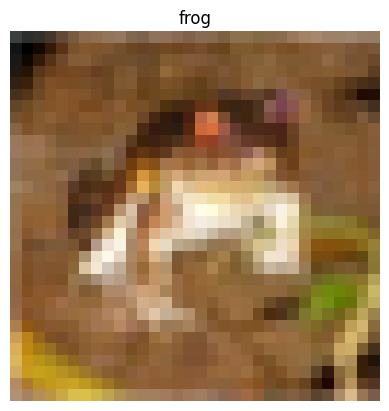

[6]


In [27]:
# 引入必要的庫
import matplotlib.pyplot as plt

# 定義 CIFAR-10 數據集的類別名稱
category = ['airplane', 'automobile', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck']

# 顯示訓練數據集中的第一張圖片
plt.imshow(train_data[0])

# 設定圖片標題為對應的類別名稱
# int(train_label_original[0]) 用於獲取第一張圖片的數字標籤並轉換為整數
plt.title(category[int(train_label_original[0])])

# 顯示圖片
plt.axis('off')  # 隱藏坐標軸
plt.show()

# 輸出第一張圖片的原始標籤
print(train_label_original[0])  # 輸出該圖片的數字標籤


In [28]:
# 訓練模型，使用訓練數據集和標籤
# epochs: 訓練的迭代次數，這裡設置為 30
# batch_size: 每次訓練使用的樣本數量，這裡設置為 512
train_history = model.fit(train_data, train_label, epochs=20, batch_size=1024)

# 顯示訓練過程的歷史記錄
# train_history 包含了每個 epoch 的訓練損失和準確率
print(f"訓練過程的歷史記錄: {train_history.history}")



Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 565ms/step - accuracy: 0.1156 - loss: 272.9778
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 217ms/step - accuracy: 0.1434 - loss: 2.4472
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.1573 - loss: 2.7160
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.1809 - loss: 2.4301
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - accuracy: 0.2037 - loss: 2.2668
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.2648 - loss: 2.0925
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.2134 - loss: 2.4751
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - accuracy: 0.3007 - loss: 2.0044
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.3018 - loss: 2.0462
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.3570 - loss: 1.8165
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - accuracy: 0.3974 - loss: 1.7065
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 

In [29]:
# 評估模型在測試數據上的表現
score = model.evaluate(test_data, test_label)

# 打印測試數據集上的準確率
print("Test accuracy:", score[1])  # score[1] 是準確率


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5203 - loss: 1.4916
Test accuracy: 0.5195000171661377


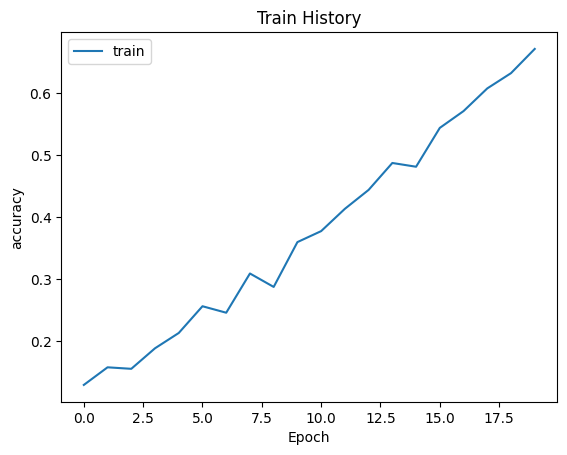

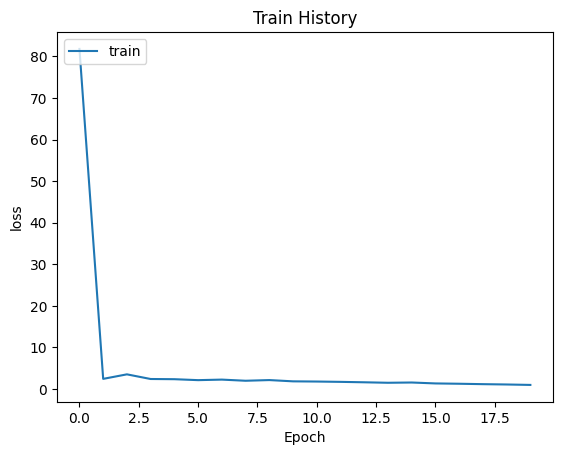

In [30]:
# 繪製正確性與損失歷史圖
import matplotlib.pyplot as plt

def show_train_history(train_history, metric):

    plt.plot(train_history.history[metric])  # 繪製指定指標的歷史值
    plt.title('Train History')  # 設置圖表標題
    plt.ylabel(metric)  # 設置 Y 軸標籤
    plt.xlabel('Epoch')  # 設置 X 軸標籤
    plt.legend(['train'], loc='upper left')  # 顯示圖例
    plt.show()  # 顯示圖表

# 繪製訓練準確性圖
show_train_history(train_history, 'accuracy')

# 繪製訓練損失圖
show_train_history(train_history, 'loss')
